Chapter 04

# 离散随机变量
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码对鸢尾花数据集的萼片长度 (`sepal_length`) 和萼片宽度 (`sepal_width`) 进行分析，使用频率矩阵和概率矩阵，计算不同变量的边际分布、条件概率以及在独立性假设下的联合概率等。代码使用自定义的 `heatmap_sum` 函数来可视化频率和概率矩阵，展示数据分布的热力图。主要步骤包括：

1. **数据准备**：对鸢尾花数据集的 `sepal_length` 和 `sepal_width` 进行四舍五入处理，并生成频率和概率矩阵。
2. **绘制散点图**：展示 `sepal_length` 与 `sepal_width` 的分布情况。
3. **计算边际分布**：对 `sepal_length` 和 `sepal_width` 的边际分布进行频率和概率的统计并绘制热力图。
4. **期望和方差计算**：计算 `sepal_length` 和 `sepal_width` 的期望和方差。
5. **条件概率**：给定特定的 `sepal_length` 或 `sepal_width`，计算条件概率。
6. **条件独立性假设**：在独立性假设下，计算 `sepal_length` 和 `sepal_width` 的联合概率分布。
7. **给定类别的条件分布**：基于特定类别（例如 `virginica`）的条件，计算和可视化不同特征的分布情况。

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_iris
pd.options.mode.chained_assignment = None  # 关闭链式赋值警告

## 加载鸢尾花数据集

In [2]:
# X_df = sns.load_dataset("iris") # 加载鸢尾花数据集
# X_df.to_pickle('X_df.pkl')
X_df = pd.read_pickle('X_df.pkl')

## 自定义函数：绘制热力图

In [3]:
def heatmap_sum(data, i_array, j_array, title, vmin, vmax, cmap):
    fig, ax = plt.subplots(figsize=(10, 10)) # 创建绘图窗口
    ax = sns.heatmap(data, cmap=cmap, # 绘制热力图
                     cbar_kws={"orientation": "horizontal"},
                     yticklabels=i_array, xticklabels=j_array,
                     ax=ax, annot=True,
                     linewidths=0.25, linecolor='grey',
                     vmin=vmin, vmax=vmax)
    ax.set_xlabel('Sepal length') # 设置x轴标签
    ax.set_ylabel('Sepal width') # 设置y轴标签
    ax.set_aspect("equal") # 设置坐标系比例
    plt.title(title) # 设置标题
    plt.yticks(rotation=0) # 设置y轴标签旋转

## 准备数据

In [4]:
X_df.sepal_length = round(X_df.sepal_length * 2) / 2 # 萼片长度四舍五入到0.5
X_df.sepal_width  = round(X_df.sepal_width * 2) / 2 # 萼片宽度四舍五入到0.5

sepal_length_array = np.sort(X_df.sepal_length.unique()) # 获取萼片长度的唯一值并排序
sepal_width_array = -np.sort(-X_df.sepal_width.unique()) # 获取萼片宽度的唯一值并降序排序

## 绘制散点图

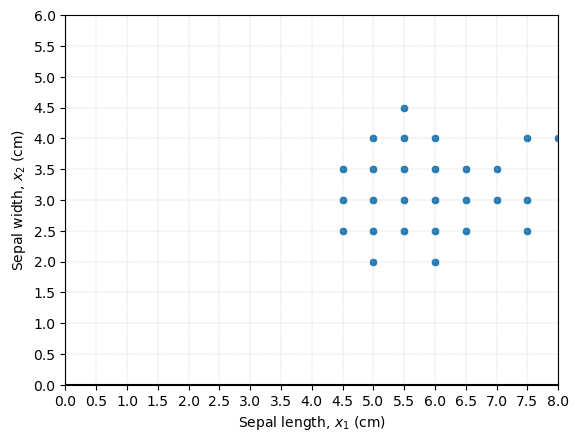

In [5]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data=X_df, x='sepal_length', y='sepal_width') # 绘制散点图
ax.axvline(x=0, c='k') # 添加x轴垂直线
ax.axhline(y=0, c='k') # 添加y轴水平线
ax.set_xlabel('Sepal length, $x_1$ (cm)') # 设置x轴标签
ax.set_ylabel('Sepal width, $x_2$ (cm)') # 设置y轴标签
ax.set_xticks(np.arange(0, 8 + 1, step=0.5)) # 设置x轴刻度
ax.set_yticks(np.arange(0, 6 + 1, step=0.5)) # 设置y轴刻度
ax.axis('scaled') # 设置坐标轴比例
ax.grid(linestyle='--', linewidth=0.25, color=[0.7,0.7,0.7]) # 设置网格样式
ax.set_xbound(lower=0, upper=8) # 设置x轴范围
ax.set_ybound(lower=0, upper=6) # 设置y轴范围

## 频率统计

In [6]:
X_df_12 = X_df[['sepal_length', 'sepal_width']] # 提取萼片长度和宽度
X_df_12['count'] = 1 # 添加计数列
frequency_matrix = X_df_12.groupby(['sepal_length', 'sepal_width']).count().unstack(level=0) # 生成频率矩阵
frequency_matrix.columns = frequency_matrix.columns.droplevel(0) # 移除多层索引
frequency_matrix = frequency_matrix.fillna(0) # 填充NaN值为0
frequency_matrix = frequency_matrix.iloc[::-1] # 逆序排列

probability_matrix = frequency_matrix / 150 # 计算概率矩阵

## 无类别标签的频率热力图

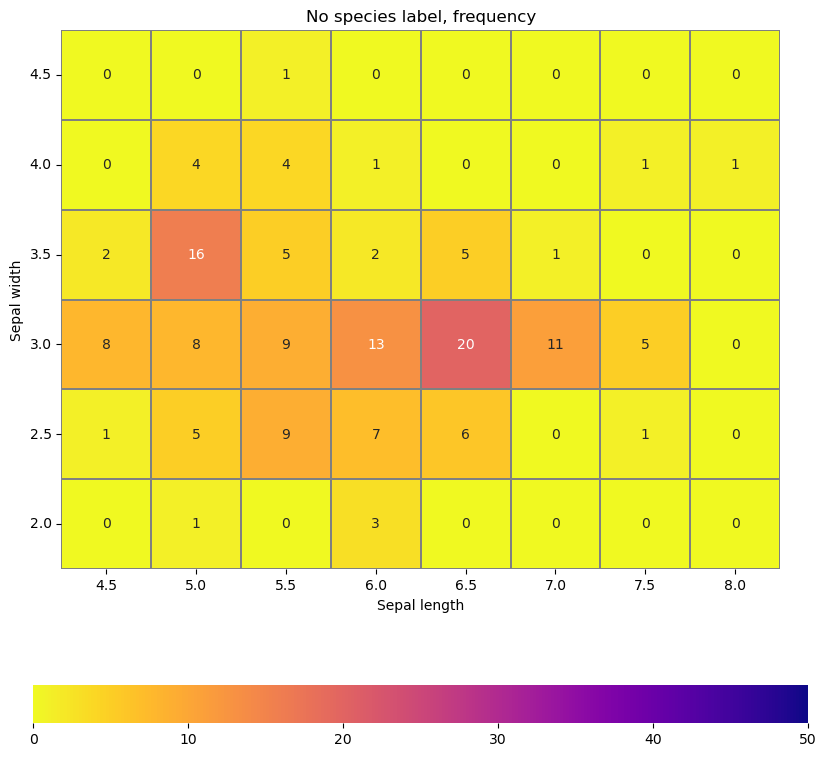

In [7]:
title = 'No species label, frequency' # 标题
heatmap_sum(frequency_matrix, sepal_width_array, sepal_length_array, title, 0, 50, 'plasma_r') # 绘制频率热力图

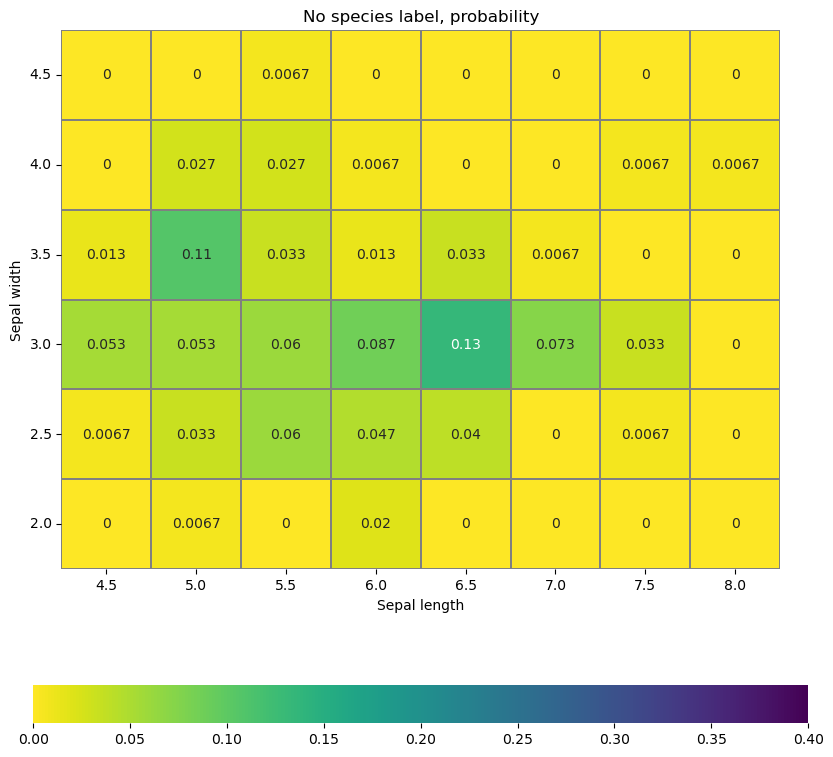

In [8]:
title = 'No species label, probability' # 标题
heatmap_sum(probability_matrix, sepal_width_array, sepal_length_array, title, 0, 0.4, 'viridis_r') # 绘制概率热力图

## 边际分布：萼片长度

In [9]:
freq_sepal_length = frequency_matrix.sum(axis=0).to_numpy().reshape((1, -1)) # 萼片长度的边际频率
prob_sepal_length = probability_matrix.sum(axis=0).to_numpy().reshape((1, -1)) # 萼片长度的边际概率

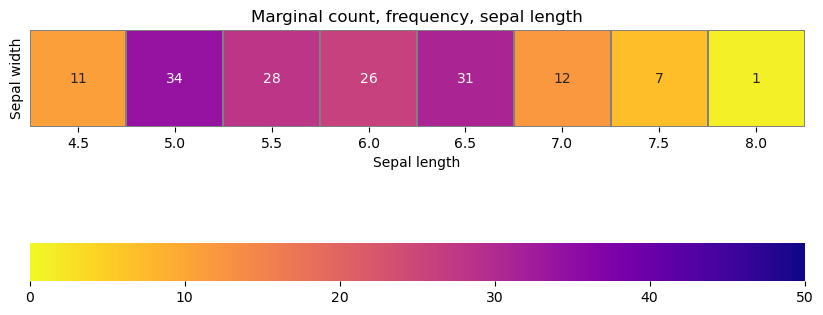

In [10]:
title = 'Marginal count, frequency, sepal length' # 标题
heatmap_sum(freq_sepal_length, [], sepal_length_array, title, 0, 50, 'plasma_r') # 绘制边际频率热力图

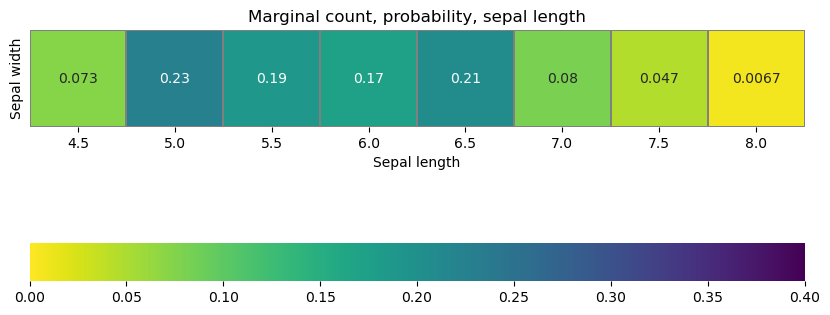

In [11]:
title = 'Marginal count, probability, sepal length' # 标题
heatmap_sum(prob_sepal_length, [], sepal_length_array, title, 0, 0.4, 'viridis_r') # 绘制边际概率热力图

## 期望和方差计算：萼片长度

In [12]:
E_X1 = prob_sepal_length @ sepal_length_array.reshape(-1, 1) # 计算萼片长度的期望

In [13]:
E_X1_ = X_df['sepal_length'].mean() # 萼片长度的均值（测试）

In [14]:
E_X1_sq = prob_sepal_length @ (sepal_length_array ** 2).reshape(-1, 1) # 萼片长度平方的期望

In [15]:
var_X1 = E_X1_sq - E_X1 ** 2 # 计算方差

In [16]:
var_X1_ = X_df['sepal_length'].var() * 149 / 150 # 方差修正值（测试）

## 边际分布：萼片宽度

In [17]:
freq_sepal_width = frequency_matrix.sum(axis=1).to_numpy().reshape((-1, 1)) # 萼片宽度的边际频率

In [18]:
prob_sepal_width = probability_matrix.sum(axis=1).to_numpy().reshape((-1, 1)) # 萼片宽度的边际概率

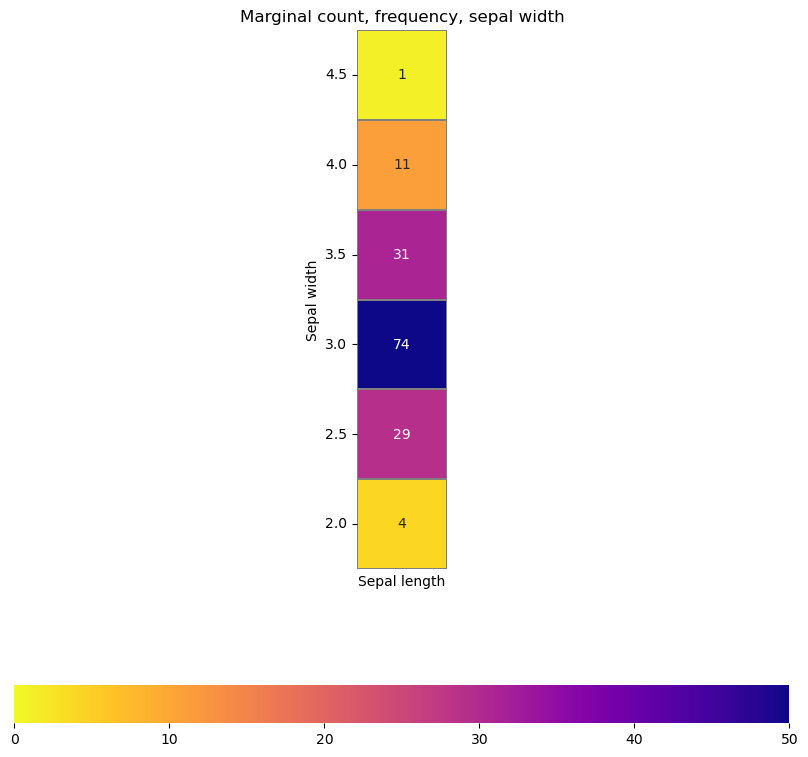

In [19]:
title = 'Marginal count, frequency, sepal width' # 标题
heatmap_sum(freq_sepal_width, sepal_width_array, [], title, 0, 50, 'plasma_r') # 绘制边际频率热力图

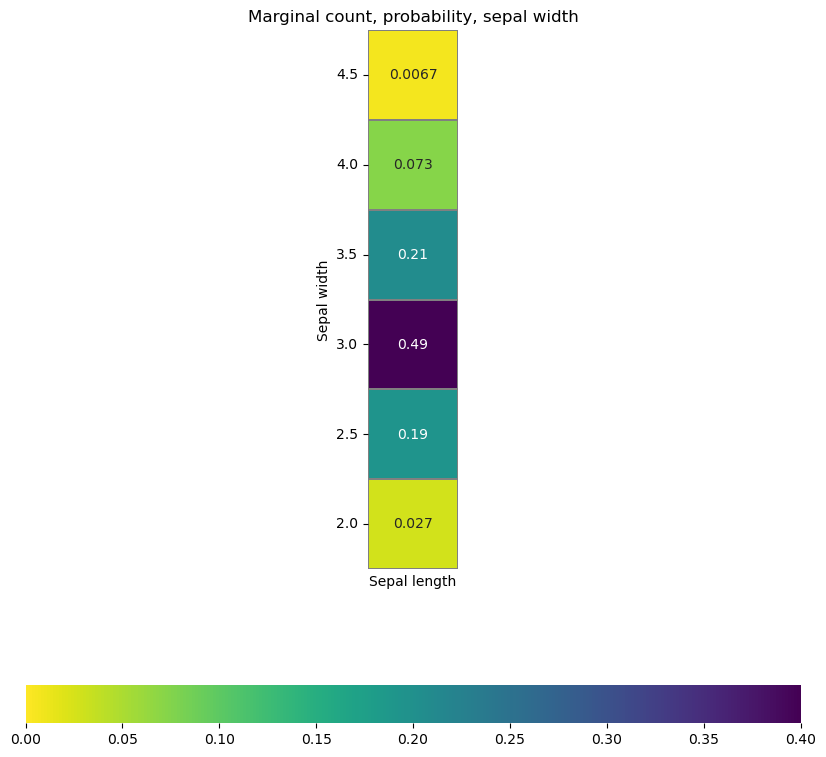

In [20]:
title = 'Marginal count, probability, sepal width' # 标题
heatmap_sum(prob_sepal_width, sepal_width_array, [], title, 0, 0.4, 'viridis_r') # 绘制边际概率热力图

## 期望计算：萼片宽度

In [21]:
E_X2 = sepal_width_array.reshape(1, -1) @ prob_sepal_width # 计算萼片宽度的期望

In [22]:
E_X2_ = X_df['sepal_width'].mean() # 萼片宽度的均值（测试）

## 假设：独立性

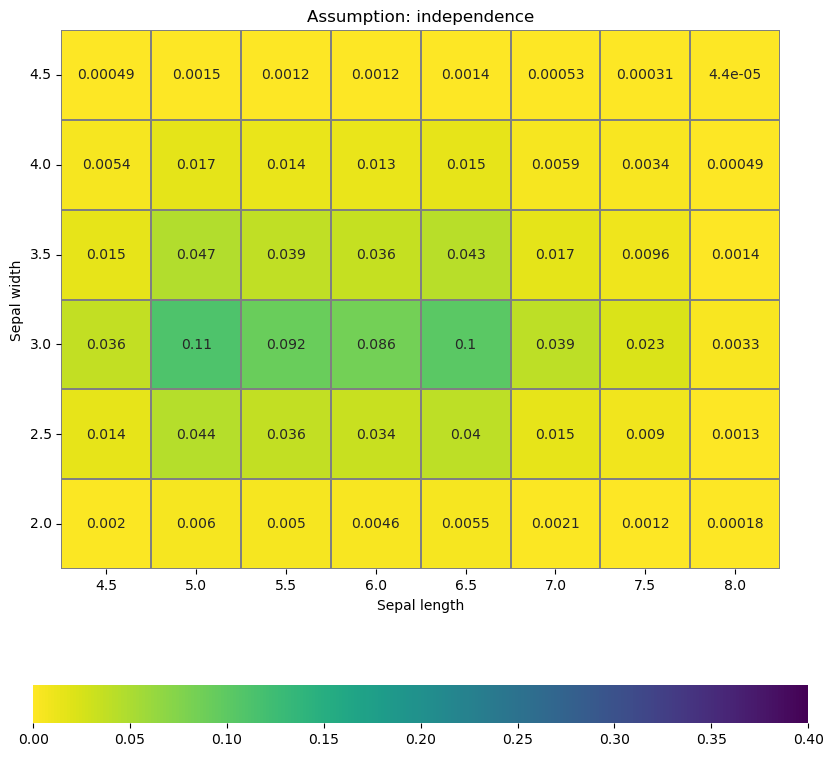

In [23]:
title = 'Assumption: independence' # 标题
heatmap_sum(prob_sepal_width @ prob_sepal_length, sepal_width_array, sepal_length_array, title, 0, 0.4, 'viridis_r') # 绘制独立性假设下的联合概率热力图

## 给定萼片长度的条件概率

In [24]:
given_sepal_length = 5 # 给定的萼片长度
prob_given_length = probability_matrix[given_sepal_length] # 条件概率

In [25]:
prob_given_length = prob_given_length / prob_given_length.sum() # 标准化

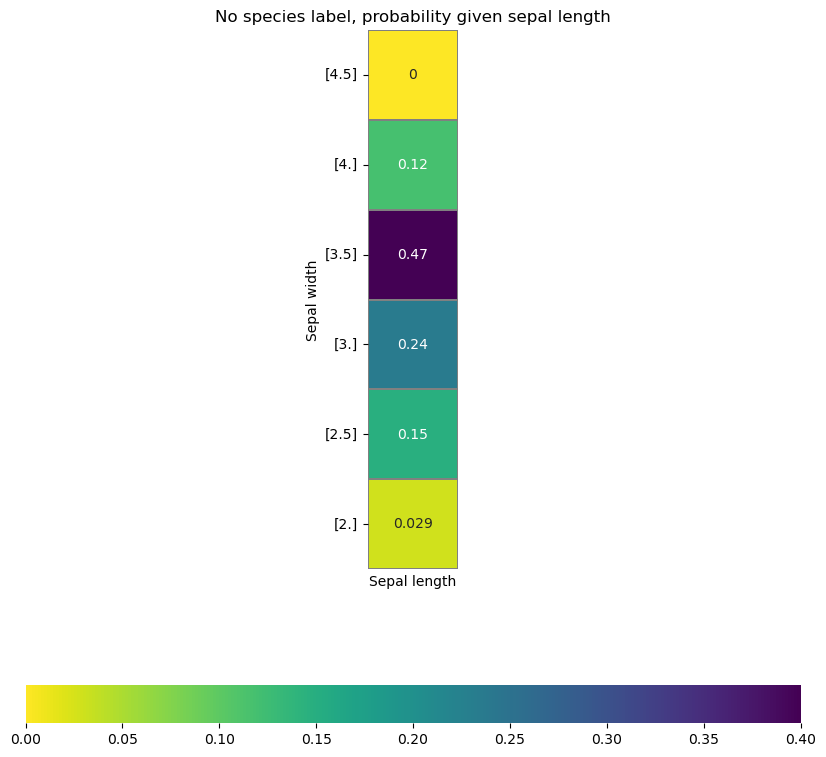

In [26]:
title = 'No species label, probability given sepal length' # 标题
heatmap_sum(prob_given_length.to_numpy().reshape((-1, 1)), 
            sepal_width_array.reshape((-1, 1)), [], title, 0, 0.4, 'viridis_r') # 绘制条件概率热力图

## 给定类别的条件分布

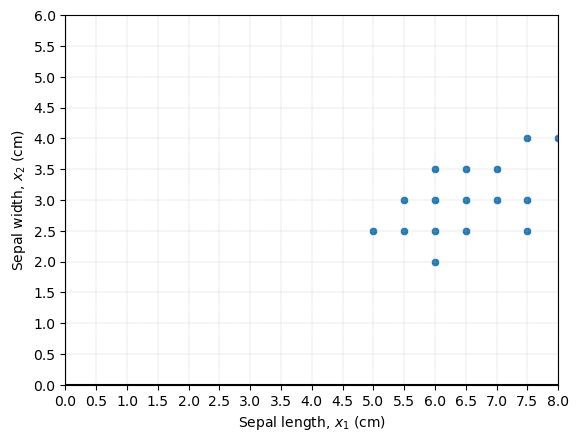

In [27]:
Given_Y = 'virginica' # 指定的类别

fig, ax = plt.subplots()
ax = sns.scatterplot(data=X_df.loc[X_df.species == Given_Y], x='sepal_length', y='sepal_width') # 绘制指定类别的散点图
ax.axvline(x = 0, c = 'k')
ax.axhline(y = 0, c = 'k')

ax.set_xlabel('Sepal length, $x_1$ (cm)')
ax.set_ylabel('Sepal width, $x_2$ (cm)')
ax.set_xticks(np.arange(0, 8 + 1, step=0.5))
ax.set_yticks(np.arange(0, 6 + 1, step=0.5))
ax.axis('scaled')
ax.grid(linestyle='--', linewidth=0.25, color=[0.7,0.7,0.7])
ax.set_xbound(lower = 0, upper = 8)
ax.set_ybound(lower = 0, upper = 6)

## 给定类别Y的X1和X2的联合概率

In [28]:
X_df_12_given_Y = X_df[['sepal_length', 'sepal_width', 'species']] # 提取萼片长度、萼片宽度和类别列
X_df_12_given_Y['count'] = 1 # 添加计数列，将每个样本计为1

In [29]:
X_df_12_given_Y.loc[~(X_df_12_given_Y.species == Given_Y), 'count'] = np.nan # 将非指定类别的计数值设为NaN

In [30]:
X_df_12_given_Y = X_df_12_given_Y[['sepal_length', 'sepal_width', 'count']] # 保留萼片长度、萼片宽度和计数列

In [31]:
frequency_matrix_given_Y = X_df_12_given_Y.groupby(['sepal_length', 'sepal_width']).count().unstack(level=0) # 按萼片长度和宽度分组计数，并生成频率矩阵

In [32]:
frequency_matrix_given_Y.columns = frequency_matrix_given_Y.columns.droplevel(0) # 去除列的多层索引

In [33]:
frequency_matrix_given_Y = frequency_matrix_given_Y.fillna(0) # 将NaN值填充为0

In [34]:
frequency_matrix_given_Y = frequency_matrix_given_Y.iloc[::-1] # 将矩阵按行逆序排列

In [35]:
probability_matrix_given_Y = frequency_matrix_given_Y / frequency_matrix_given_Y.sum().sum() # 计算概率矩阵，将每个频率值除以总频率

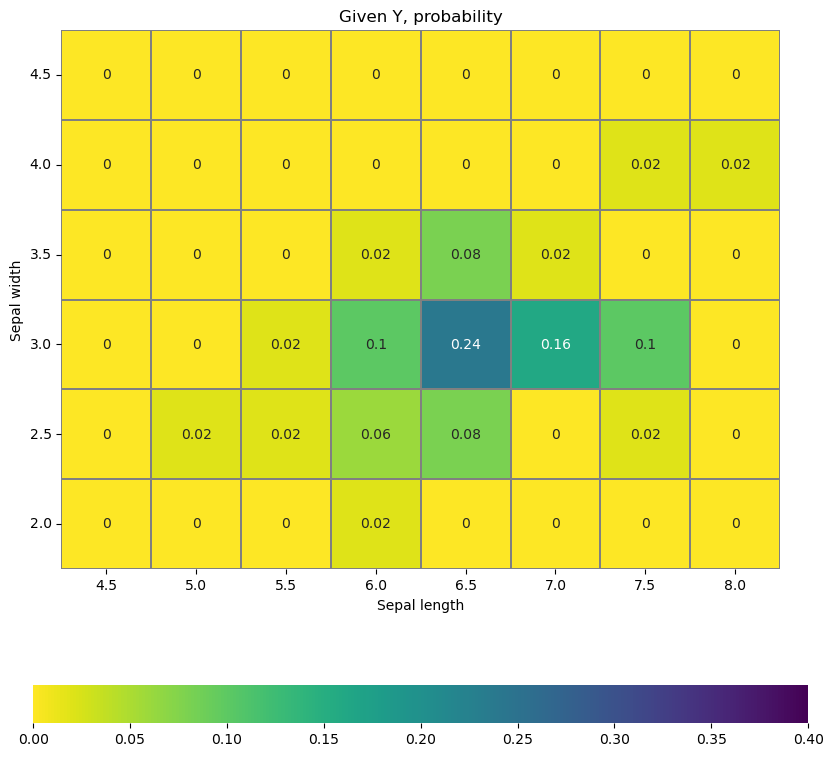

In [36]:
title = 'Given Y, probability' # 标题

heatmap_sum(probability_matrix_given_Y, sepal_width_array, sepal_length_array, title, 0, 0.4, 'viridis_r') # 条件概率分布热力图

## 条件边际分布：萼片长度

In [37]:
freq_sepal_length_given_Y = frequency_matrix_given_Y.sum(axis=0).to_numpy().reshape((1, -1)) # 计算给定类别Y的萼片长度边际频率

In [38]:
prob_sepal_length_given_Y = probability_matrix_given_Y.sum(axis=0).to_numpy().reshape((1, -1)) # 计算给定类别Y的萼片长度边际概率

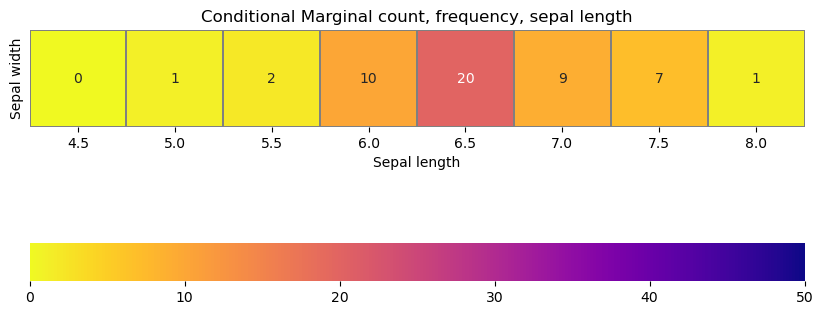

In [39]:
title = 'Conditional Marginal count, frequency, sepal length' # 标题
heatmap_sum(freq_sepal_length_given_Y, [], sepal_length_array, title, 0, 50, 'plasma_r') # 绘制条件边际频率热力图

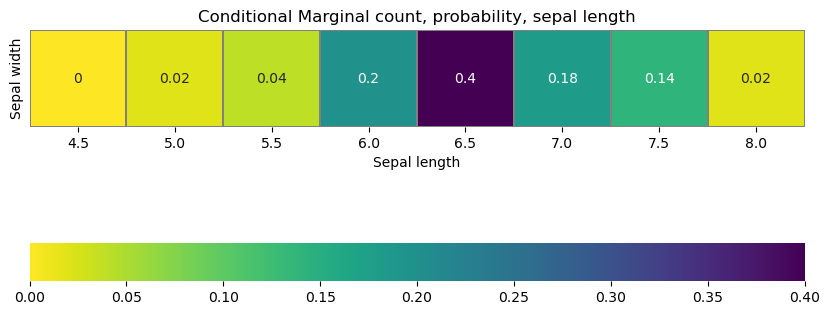

In [40]:
title = 'Conditional Marginal count, probability, sepal length' # 标题
heatmap_sum(prob_sepal_length_given_Y, [], sepal_length_array, title, 0, 0.4, 'viridis_r') # 绘制条件边际概率热力图

## 条件边际分布：萼片宽度

In [41]:
freq_sepal_width_given_Y = frequency_matrix_given_Y.sum(axis=1).to_numpy().reshape((-1, 1)) # 计算给定类别Y的萼片宽度边际频率
prob_sepal_width_given_Y = probability_matrix_given_Y.sum(axis=1).to_numpy().reshape((-1, 1)) # 计算给定类别Y的萼片宽度边际概率

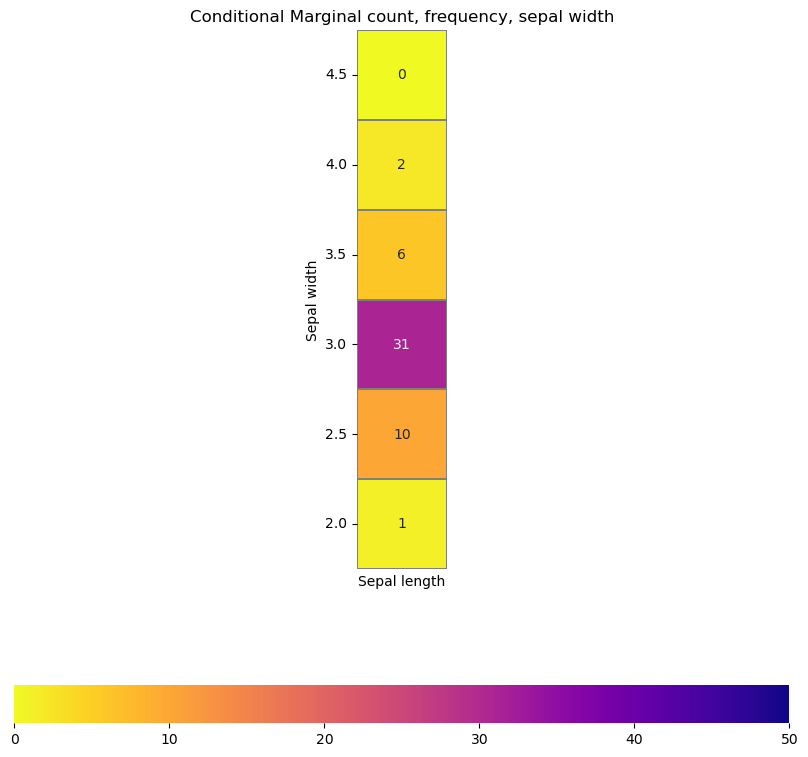

In [42]:
title = 'Conditional Marginal count, frequency, sepal width' # 标题
heatmap_sum(freq_sepal_width_given_Y, sepal_width_array, [], title, 0, 50, 'plasma_r') # 绘制条件边际频率热力图

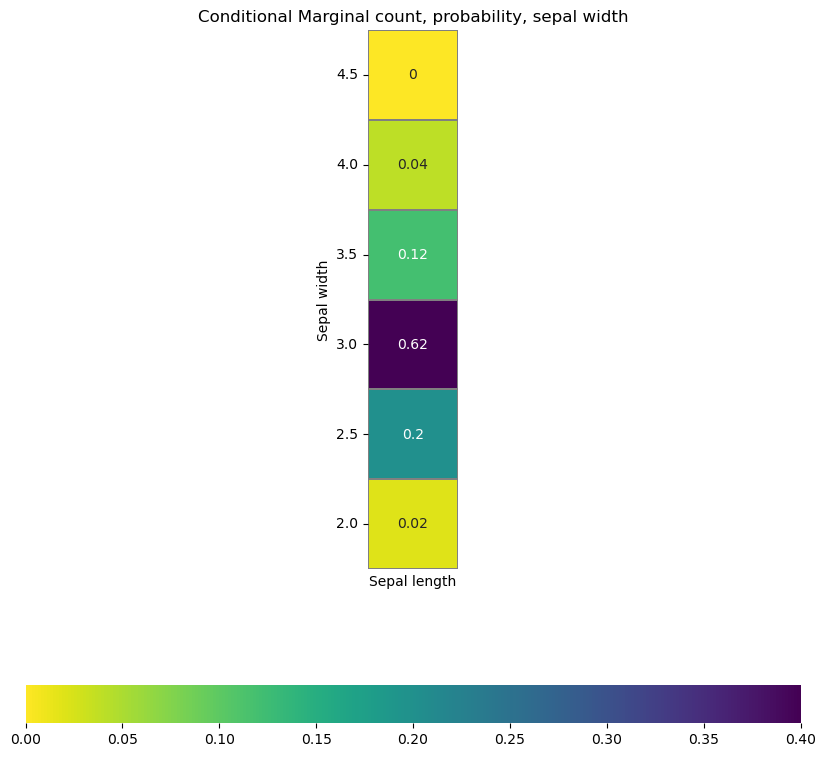

In [43]:
title = 'Conditional Marginal count, probability, sepal width' # 标题
heatmap_sum(prob_sepal_width_given_Y, sepal_width_array, [], title, 0, 0.4, 'viridis_r') # 绘制条件边际概率热力图

## 条件独立性假设

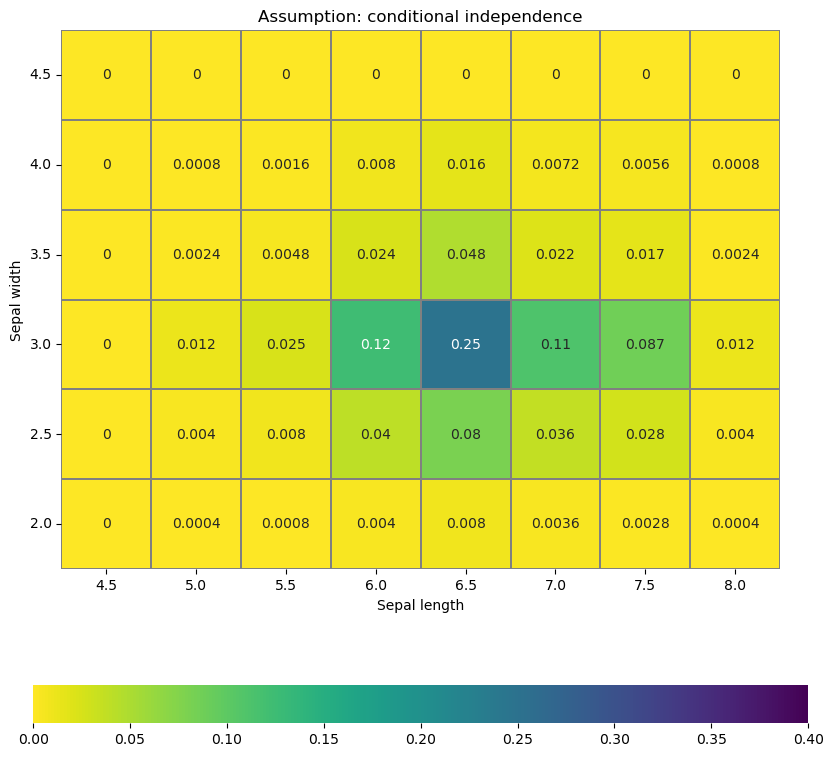

In [44]:
title = 'Assumption: conditional independence' # 标题
heatmap_sum(prob_sepal_width_given_Y @ prob_sepal_length_given_Y, sepal_width_array, sepal_length_array, title, 0, 0.4, 'viridis_r') # 绘制条件独立性假设下的联合概率热力图